BUSI 525 - Empirical Asset Pricing - Spring 2024 
Assignment 1 - Skill versus Luck 

Part 1 - No Skilled Funds 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [22]:
np.random.seed(0)

# Parameters 
N = 1000  
T = 120   
mean_market_return = 0.05 / 12  
sd_market_return = 0.2 / np.sqrt(12)  
sd_residual = 0.3 / np.sqrt(12)  

# Simulate market excess returns
market_excess_returns = np.random.normal(mean_market_return, sd_market_return, T)

# Initialize to store alphas and t-statistics
alphas = np.zeros(N)
t_stats = np.zeros(N) 

In [23]:
# Simulate each fund's returns and calculate alpha and t-statistic
for i in range(N):
    # Fund returns are market returns plus noise
    fund_returns = market_excess_returns + np.random.normal(0, sd_residual, T)
    
    # Estimate alpha and beta using linear regression
    beta, alpha = np.polyfit(market_excess_returns, fund_returns, 1)
    
    # Estimate the standard error of alpha
    residuals = fund_returns - (alpha + beta * market_excess_returns)
    standard_error = np.std(residuals) / np.sqrt(T)

    # Store alpha and its t-statistic
    alphas[i] = alpha
    t_stats[i] = alpha / standard_error 

In [24]:
# Count the number of funds with significant alpha at 5% level
significant_alphas = np.sum(np.abs(t_stats) > stats.t.ppf(1 - 0.05 / 2, T - 2)) 

print(f"Part 1.1 - Number of funds with significant alpha at the 5% level: {significant_alphas}")

Part 1.1 - Number of funds with significant alpha at the 5% level: 50


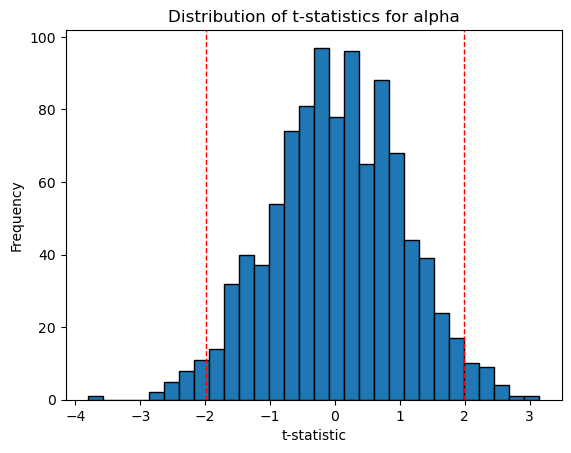

In [25]:
# Part 1.2 - Plot the histogram of t-statistics
plt.hist(t_stats, bins=30, edgecolor='black')
plt.axvline(stats.t.ppf(1 - 0.05 / 2, T - 2), color='red', linestyle='dashed', linewidth=1)
plt.axvline(-stats.t.ppf(1 - 0.05 / 2, T - 2), color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of t-statistics for alpha')
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.show() 

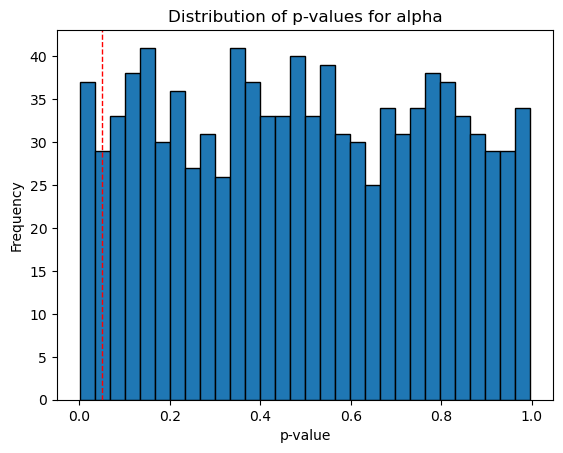

In [26]:
# Part 1.2 - Plot the histogram of p-values
p_values = 2 * (1 - stats.t.cdf(np.abs(t_stats), T - 2))
plt.hist(p_values, bins=30, edgecolor='black')
plt.axvline(0.05, color='red', linestyle='dashed', linewidth=1)
plt.title('Distribution of p-values for alpha')
plt.xlabel('p-value')
plt.ylabel('Frequency')
plt.show() 

Part 1.3 - What does the distribution of p-values look like? 